## CS 773 - Course Project
#### Dániel Bence Papp
#### 07/22/2023

# Imports

In [119]:
import pandas as pd

In [120]:
data = pd.read_csv('airline_passenger_satisfaction-2.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

# Question 1

In [161]:
data[['Departure Delay', 'Arrival Delay']].describe()

,Departure Delay,Arrival Delay
count,129880.000000,129487.000000
mean,14.713713,15.091129
std,38.071126,38.465650
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,12.000000,13.000000
max,1592.000000,1584.000000


In [167]:
data[['Departure Delay', 'Arrival Delay']].mode()

,Departure Delay,Arrival Delay
0,0,0.0


In [168]:
data[['Departure Delay', 'Arrival Delay']].median()

Departure Delay    0.0
Arrival Delay      0.0
dtype: float64

In [166]:
data[['Departure Delay', 'Arrival Delay']].quantile([0.1, 0.25, 0.5, 0.75, 0.9])

,Departure Delay,Arrival Delay
0.10,0.0,0.0
0.25,0.0,0.0
0.50,0.0,0.0
0.75,12.0,13.0
0.90,44.0,44.0


In [ ]:
data[['Departure Delay', 'Arrival Delay']].skew()

Departure Delay    6.821980
Arrival Delay      6.670125
dtype: float64

In [162]:
data[['Departure Delay', 'Arrival Delay']].cov()

,Departure Delay,Arrival Delay
Departure Delay,1449.410651,1408.468314
Arrival Delay,1408.468314,1479.606248


In [163]:
data[['Departure Delay', 'Arrival Delay']].corr('pearson')

,Departure Delay,Arrival Delay
Departure Delay,1.000000,0.965291
Arrival Delay,0.965291,1.000000


array([[<Axes: title={'center': 'Departure Delay'}>,
        <Axes: title={'center': 'Arrival Delay'}>]], dtype=object)

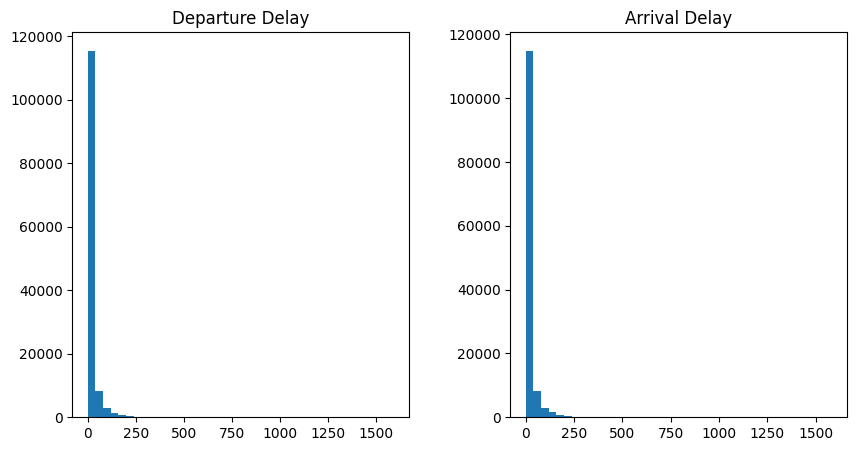

In [165]:
data[['Departure Delay', 'Arrival Delay']].hist(bins=40, figsize=(10, 5), grid=False)

In [121]:
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


# Question 2
## Discretization of nominal features

Discretize age (A3) to nominal values using the following criteria: 0-15: Child; 16-35: Youth; 36-55 Middle age; 56-70: Old; >70- Senior

Discretize flight distance (A7) to nominal values using the following criteria: 0-500 miles: Short haul; 501-3000 miles: Medium haul; >3000 Long haul

Discretize delays (A8 and A9) to nominal values: Small: 0-15; Medium: 16-45; Long: > 45

In [155]:
# discretize the satisfaction column to 0 and 1
# 0 = neutral or dissatisfied
# 1 = satisfied
# correlation between in-flight service and satisfaction for long-haul flights only

data['d_Satisfaction'] = data['Satisfaction'].map({'Neutral or Dissatisfied': 0, 'Satisfied': 1})

data['d_Age'] = pd.cut(data['Age'], bins=[0, 15, 35, 55, 70, 100], labels=['Child', 'Youth', 'Middle Age', 'Old', 'Senior'])

data['d_Flight Distance'] = pd.cut(data['Flight Distance'], bins=[0, 500, 3000, 10000], labels=['Short Haul', 'Medium Haul','Long Haul'])

data['d_Arrival Delay'] = pd.cut(data['Arrival Delay'], bins=[-0.1, 15, 45, 1600], labels=['Small', 'Medium', 'Long'])

data['d_Departure Delay'] = pd.cut(data['Departure Delay'], bins=[-0.1, 15, 45, 1600], labels=['Small', 'Medium', 'Long'])

In [156]:
data.head(20)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,d_Satisfaction,d_Age,d_Flight Distance,d_Arrival Delay,d_Departure Delay
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,5,3,5,5,Neutral or Dissatisfied,0,Middle Age,Medium Haul,Small,Small
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,2,5,5,Satisfied,1,Youth,Medium Haul,Medium,Medium
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,4,3,3,Satisfied,1,Middle Age,Medium Haul,Small,Small
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,2,5,5,Satisfied,1,Middle Age,Medium Haul,Small,Small
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,3,3,3,Satisfied,1,Middle Age,Long Haul,Small,Small
5,6,Male,43,Returning,Business,Business,3788,0,0.0,4,...,4,4,4,4,Satisfied,1,Middle Age,Long Haul,Small,Small
6,7,Male,43,Returning,Business,Business,1963,0,0.0,3,...,5,3,5,5,Satisfied,1,Middle Age,Medium Haul,Small,Small
7,8,Female,60,Returning,Business,Business,853,0,3.0,3,...,3,4,3,3,Satisfied,1,Old,Medium Haul,Small,Small
8,9,Male,50,Returning,Business,Business,2607,0,0.0,1,...,4,4,4,4,Neutral or Dissatisfied,0,Middle Age,Medium Haul,Small,Small
9,10,Female,38,Returning,Business,Business,2822,13,0.0,2,...,5,2,5,5,Satisfied,1,Middle Age,Medium Haul,Small,Small


# Question 3

In [157]:
# correlation between in-flight service and satisfaction for long-haul flights only which are over 3000 miles

df = data[data['Flight Distance'] > 3000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10313 entries, 4 to 129855
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   ID                                      10313 non-null  int64   
 1   Gender                                  10313 non-null  object  
 2   Age                                     10313 non-null  int64   
 3   Customer Type                           10313 non-null  object  
 4   Type of Travel                          10313 non-null  object  
 5   Class                                   10313 non-null  object  
 6   Flight Distance                         10313 non-null  int64   
 7   Departure Delay                         10313 non-null  int64   
 8   Arrival Delay                           10290 non-null  float64 
 9   Departure and Arrival Time Convenience  10313 non-null  int64   
 10  Ease of Online Booking                  10313 non-

In [158]:
df[['In-flight Service', 'd_Satisfaction']].corr('pearson')

,In-flight Service,d_Satisfaction
In-flight Service,1.000000,0.519821
d_Satisfaction,0.519821,1.000000


In [159]:
df[['Departure Delay', 'd_Satisfaction']].corr('pearson')

,Departure Delay,d_Satisfaction
Departure Delay,1.000000,-0.081885
d_Satisfaction,-0.081885,1.000000


<Axes: >

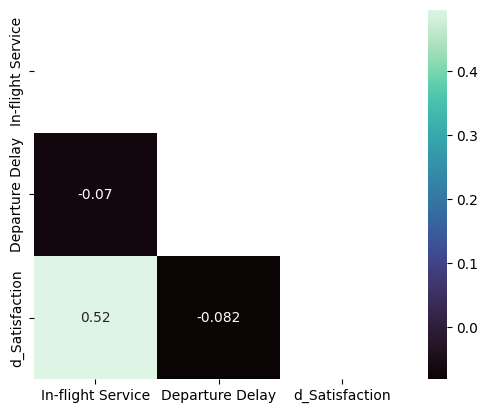

In [160]:
# heatmap of the correlation matrix between in-flight service, departure delays, and satisfaction for long-haul flights only

import seaborn as sns
import numpy as np

corr_arr = df[['In-flight Service', 'Departure Delay', 'd_Satisfaction']].corr()
mask = np.triu(np.ones_like(corr_arr, dtype=bool))
sns.heatmap(corr_arr, annot=True, mask=mask, cmap='mako', square=True, robust=True)

In [128]:
q3_2 = data[['In-flight Entertainment', 'Arrival Delay', 'd_Satisfaction']]

<Axes: >

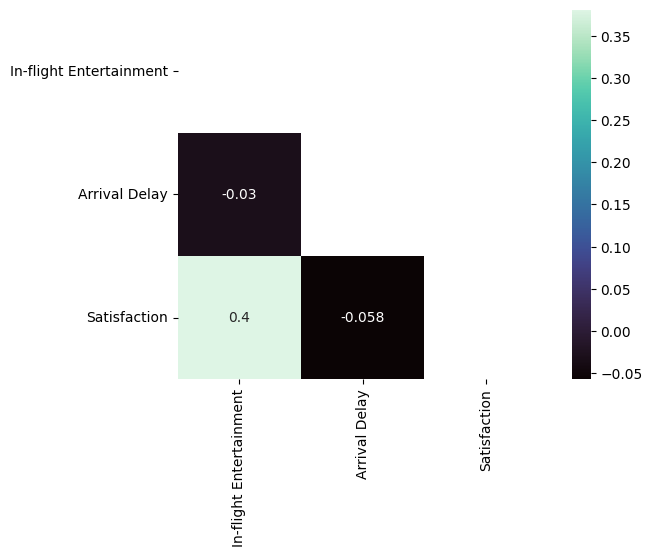

In [ ]:
corr_arr_q3 = q3_2.corr()

mask_q3 = np.triu(np.ones_like(corr_arr_q3, dtype=bool))
sns.heatmap(corr_arr_q3, annot=True, mask=mask_q3, cmap='mako', square=True, robust=True)

In [129]:
q3_2[['In-flight Entertainment', 'Arrival Delay', 'd_Satisfaction']].corr('pearson')

,In-flight Entertainment,Arrival Delay,d_Satisfaction
In-flight Entertainment,1.000000,-0.030230,0.398234
Arrival Delay,-0.030230,1.000000,-0.058275
d_Satisfaction,0.398234,-0.058275,1.000000


<Axes: >

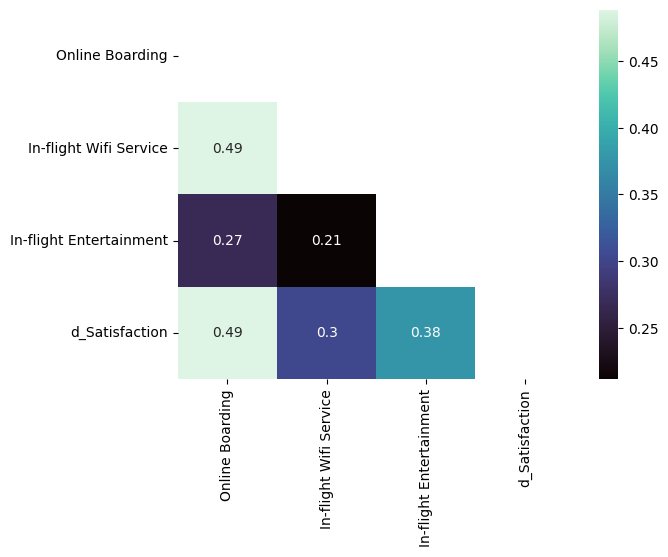

In [130]:
from matplotlib import pyplot as plt

# plt.figure(figsize=(20, 10))
eda_data = data[data['Flight Distance'] < 3000]
eda = eda_data[["Online Boarding", "In-flight Wifi Service", "In-flight Entertainment", "d_Satisfaction"]].corr()
eda_mask = np.triu(np.ones_like(eda, dtype=bool))
sns.heatmap(eda, annot=True, mask=eda_mask, cmap='mako', square=False, robust=True)
# plt.show()

# Question 4

With Gender, Age, Type of travel, Flight distance, Class, Arrival delays, and Overall satisfaction as
attributes, determine association rules with a minimum support of 100 and a minimum confidence of
60%.

In [197]:
from mlxtend.frequent_patterns import apriori, association_rules

feat_data = data[['Gender', 'd_Age', 'Type of Travel', 'd_Flight Distance', 'Class', 'd_Arrival Delay', 'Satisfaction']]

# convert the data into one-hot encoded format
feat_data = pd.get_dummies(feat_data)

# find frequent itemsets with minimum support of 100
frequent_itemsets = apriori(feat_data, min_support=0.1, use_colnames=True)

# generate association rules with minimum confidence of 60%
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# print the association rules
rules.head(20)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gender_Female),(Type of Travel_Business),0.507384,0.690584,0.352587,0.694912,1.006268,0.002196,1.014187,0.012644
1,(Gender_Female),(d_Flight Distance_Medium Haul),0.507384,0.610494,0.309478,0.609949,0.999106,-0.000277,0.998601,-0.001813
2,(Gender_Female),(d_Arrival Delay_Small),0.507384,0.769395,0.390453,0.769541,1.000190,0.000074,1.000635,0.000386
3,(Gender_Male),(Type of Travel_Business),0.492616,0.690584,0.337997,0.686126,0.993545,-0.002196,0.985797,-0.012644
4,(Gender_Male),(d_Flight Distance_Medium Haul),0.492616,0.610494,0.301016,0.611056,1.000921,0.000277,1.001445,0.001813
5,(Gender_Male),(d_Arrival Delay_Small),0.492616,0.769395,0.378942,0.769244,0.999804,-0.000074,0.999346,-0.000386
6,(d_Age_Youth),(Type of Travel_Business),0.340922,0.690584,0.243702,0.714831,1.035111,0.008266,1.085028,0.051466
7,(d_Age_Youth),(d_Flight Distance_Medium Haul),0.340922,0.610494,0.218879,0.642020,1.051639,0.010748,1.088065,0.074504
8,(d_Age_Youth),(d_Arrival Delay_Small),0.340922,0.769395,0.260949,0.765419,0.994833,-0.001355,0.983053,-0.007819
9,(d_Age_Youth),(Satisfaction_Neutral or Dissatisfied),0.340922,0.565537,0.219379,0.643488,1.137834,0.026575,1.218647,0.183798
